##  Central Tendency Measures

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"Z_4_DS_CENTRAL_TENDENCY_MEASURES.csv")
df.head()

,Student,Overall Marks,Gender,Subject
0,Anish,97,Male,English
1,Rishabh,83,Male,English
2,Ajay,78,Male,Physics
3,Abhinav,86,Male,Chemistry
4,Anurag,91,Male,English


In [10]:
df = df.rename(columns={'Overall Marks':'Score'})

In [11]:
df.head()

,Student,Score,Gender,Subject
0,Anish,97,Male,English
1,Rishabh,83,Male,English
2,Ajay,78,Male,Physics
3,Abhinav,86,Male,Chemistry
4,Anurag,91,Male,English


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Student  100 non-null    object
 1   Score    100 non-null    int64 
 2   Gender   100 non-null    object
 3   Subject  100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.9+ KB


In [15]:
df.describe()

,Score
count,100.00000
mean,68.21000
std,26.34476
min,0.00000
25%,57.25000
50%,77.00000
75%,87.25000
max,100.00000


In [17]:
df.describe(include='object')

,Student,Gender,Subject
count,100,100,100
unique,100,2,3
top,Anish,Male,Chemistry
freq,1,79,36


In [18]:
df.isnull().sum()

Student    0
Score      0
Gender     0
Subject    0
dtype: int64

In [19]:
df.value_counts()

Student  Score  Gender  Subject  
ALOK     85     Male    English      1
Vaibhav  98     Male    Physics      1
jay      81     Male    Physics      1
gokul    40     Male    Chemistry    1
dinesh   18     Male    Physics      1
                                    ..
Mayank   51     Male    Physics      1
Manoj    70     Male    English      1
MOHIT    94     Male    Chemistry    1
Lily     90     Female  Chemistry    1
yash     86     Male    Physics      1
Name: count, Length: 100, dtype: int64

In [20]:
df.Subject.unique()

array(['English', 'Physics', 'Chemistry'], dtype=object)

In [21]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [22]:
df.Score.min()

0

In [23]:
df.Score.max()

100

### Range

In [24]:
range = df.Score.max()-df.Score.min()
range

100

In [25]:
df.Score.std()

26.344759699727064

In [26]:
df.Score.var()

694.0463636363633

### Histogram

<Axes: >

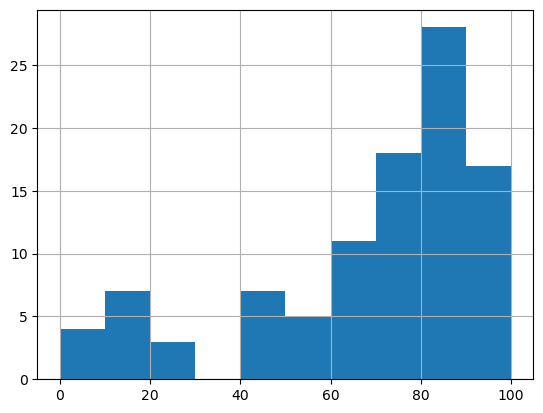

In [27]:
df.Score.hist()

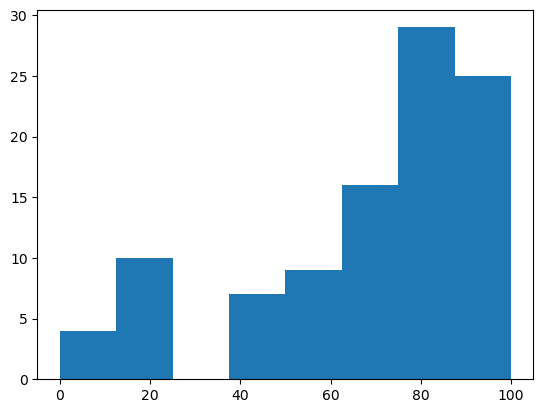

In [30]:
plt.hist(df.Score, bins=8);

### Distribution Plot

C:\Users\gjithend\AppData\Local\Temp\ipykernel_48160\525488125.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Score,bins=8);
C:\Users\gjithend\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


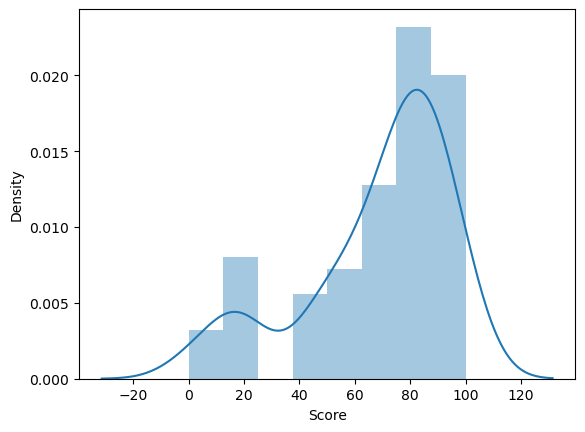

In [34]:
sns.distplot(df.Score,bins=8);

C:\Users\gjithend\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


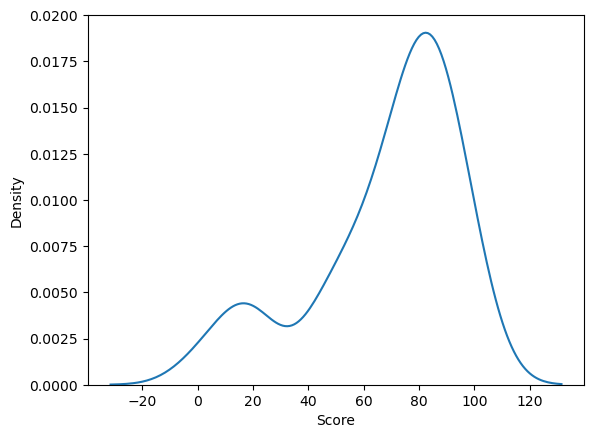

In [36]:
sns.kdeplot(df.Score);

In [37]:
### Boxplot

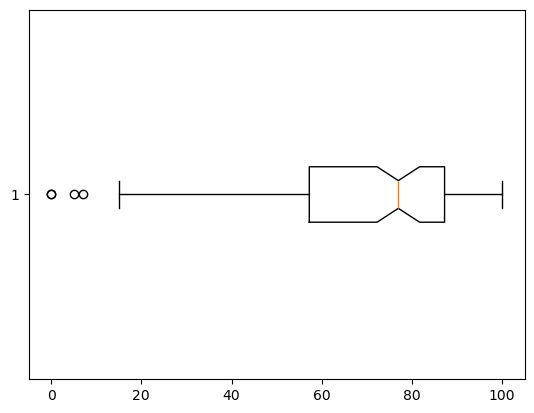

In [46]:
plt.boxplot(df.Score,vert=False,notch=True)
plt.show()

<Axes: xlabel='Score'>

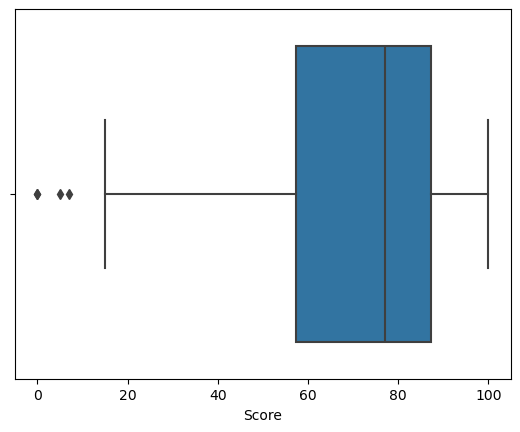

In [44]:
sns.boxplot(x=df.Score)

In [47]:
np.percentile(df.Score,[0,25,50,75,100])

array([  0.  ,  57.25,  77.  ,  87.25, 100.  ])

In [49]:
(df['Score']<0).sum()

0

In [50]:
range

100

In [51]:
iqr = np.abs(np.percentile(df.Score,[25]) - np.percentile(df.Score,[75]))
iqr

array([30.])

In [57]:
ll = np.percentile(df.Score,25) - 1.5*iqr
ll

ul = np.percentile(df.Score,75) + 1.5*iqr
ul

array([132.25])

In [59]:
type(ll[0])

numpy.float64

In [60]:
df['Score'] = np.where(df['Score']<ll[0],ll,df['Score'])
df['Score'] = np.where(df['Score']>ul[0],ul,df['Score'])

In [61]:
df.Score

0     97.00
1     83.00
2     78.00
3     86.00
4     91.00
      ...  
95    77.00
96    55.00
97    12.25
98    73.00
99    82.00
Name: Score, Length: 100, dtype: float64

In [62]:
df.Score.min()

12.25

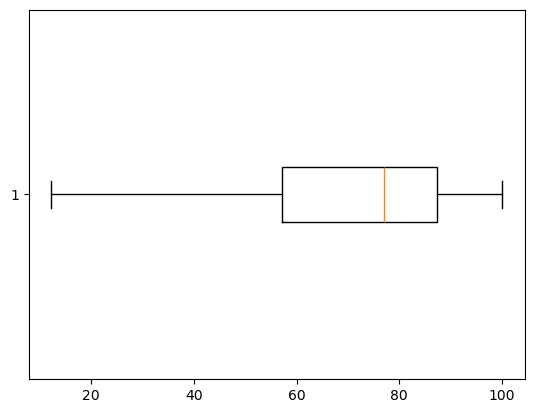

In [65]:
plt.boxplot(df['Score'],vert=False)
plt.show()

##  Univariant Analysis Hands On

In [70]:
del range

In [108]:
from faker import Faker
import pandas as pd
import random

# Initialize Faker instance
fake = Faker()

# Genres to choose from
genres = ['Action', 'Comedy', 'Drama', 'Horror', 'Sci-Fi', 'Romance', 'Thriller', 'Adventure']

# Generate movie dataset
num_records = 100  # Number of movies to generate
data = []

for _ in range(num_records):
    director = fake.name()  # Random director name
    movie_name = fake.company()  # Random movie title (using company as movie name)
    rating = round(random.uniform(1.0, 10.0), 1)  # Random rating between 1.0 and 10.0
    genre = random.choice(genres)  # Random genre
    year = random.randint(2000, 2023)  # Random release year
    duration = random.randint(80, 180)  # Random duration between 80 and 180 minutes
    
    data.append({
        'director': director,
        'movie_name': movie_name,
        'rating': rating,
        'genre': genre,
        'year': year,
        'duration_minutes': duration
    })

# Create DataFrame
df = pd.DataFrame(data)

# Show first few rows
print(df.head())

         director                  movie_name  rating      genre  year  \
0    Robin Graham   Ramirez, Castro and Young     2.3  Adventure  2010   
1  Sheryl Collier    Olson, Combs and Johnson     7.7     Action  2014   
2     Eric Garcia                    Byrd Ltd     3.3      Drama  2000   
3   Matthew Lopez  Gross, Maddox and Ferguson     7.7     Comedy  2006   
4   Jessica Cohen             Mcpherson Group     7.5    Romance  2021   

   duration_minutes  
0               134  
1               145  
2                84  
3               123  
4                84  


###  What were the average duration and rating of all movies?

In [110]:
df.rating.mean().round(2)

5.62

### What were the average duration and rating of all movies in top three Genre versus movies in remaining Genre

In [111]:
x = (df['genre'].value_counts().reset_index().sort_values('count',ascending=False)).genre[0:3]
x

0      Drama
1    Romance
2     Comedy
Name: genre, dtype: object

In [112]:
y = x.values
y

array(['Drama', 'Romance', 'Comedy'], dtype=object)

In [113]:
type(y)

numpy.ndarray

In [114]:
df.loc[df['genre'].isin(y)].head()

,director,movie_name,rating,genre,year,duration_minutes
2,Eric Garcia,Byrd Ltd,3.3,Drama,2000,84
3,Matthew Lopez,"Gross, Maddox and Ferguson",7.7,Comedy,2006,123
4,Jessica Cohen,Mcpherson Group,7.5,Romance,2021,84
5,Tyler Daniels,Blake-Bush,7.3,Comedy,2022,167
7,Timothy Mcconnell,"Bishop, Ayala and Mendez",3.6,Romance,2019,142


In [115]:
df['t3_genre'] = np.where(df['genre'].isin(y),'y','n')
df

,director,movie_name,rating,genre,year,duration_minutes,t3_genre
0,Robin Graham,"Ramirez, Castro and Young",2.3,Adventure,2010,134,n
1,Sheryl Collier,"Olson, Combs and Johnson",7.7,Action,2014,145,n
2,Eric Garcia,Byrd Ltd,3.3,Drama,2000,84,y
3,Matthew Lopez,"Gross, Maddox and Ferguson",7.7,Comedy,2006,123,y
4,Jessica Cohen,Mcpherson Group,7.5,Romance,2021,84,y
...,...,...,...,...,...,...,...
95,Colin Gamble,Marsh-Miller,7.7,Comedy,2018,87,y
96,Katie Lindsey,Thompson Group,1.1,Comedy,2018,175,y
97,Tonya Wilkins,Campbell-Wood,8.0,Adventure,2000,116,n
98,Andrew Nielsen,"Carlson, Schroeder and Preston",8.9,Drama,2023,116,y


In [116]:
df.loc[df['t3_genre']=='y']['rating'].mean()

5.740909090909091

###  Number of movies within each of top three genre's

In [117]:
df.loc[df['t3_genre']=='y'].groupby('genre')['movie_name'].nunique()

genre
Comedy     14
Drama      15
Romance    14
Name: movie_name, dtype: int64

In [121]:
df1 = df.loc[df['t3_genre']=='y',['genre','duration_minutes']]
df1.head()

,genre,duration_minutes
2,Drama,84
3,Comedy,123
4,Romance,84
5,Comedy,167
7,Romance,142


<Axes: xlabel='genre', ylabel='duration_minutes'>

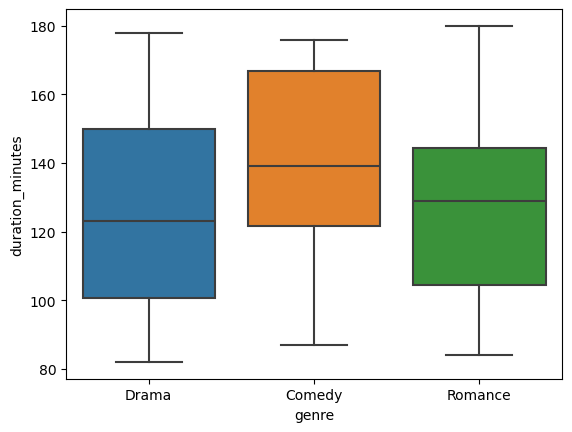

In [132]:
sns.boxplot(x =df1['genre'] ,y=df1['duration_minutes'])

In [133]:
df.head()

,director,movie_name,rating,genre,year,duration_minutes,t3_genre
0,Robin Graham,"Ramirez, Castro and Young",2.3,Adventure,2010,134,n
1,Sheryl Collier,"Olson, Combs and Johnson",7.7,Action,2014,145,n
2,Eric Garcia,Byrd Ltd,3.3,Drama,2000,84,y
3,Matthew Lopez,"Gross, Maddox and Ferguson",7.7,Comedy,2006,123,y
4,Jessica Cohen,Mcpherson Group,7.5,Romance,2021,84,y


## Bivariant Analysis

<Axes: xlabel='duration_minutes', ylabel='rating'>

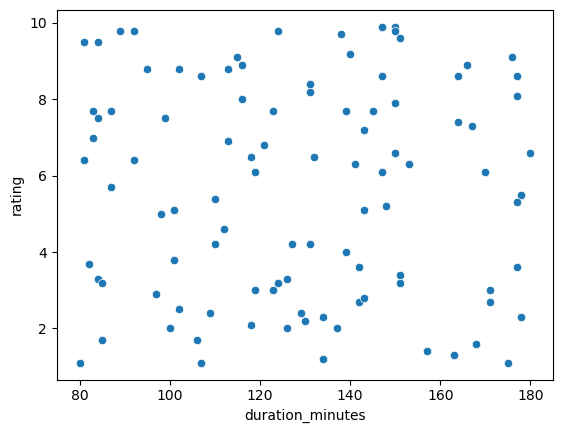

In [134]:
sns.scatterplot(x=df.duration_minutes,y=df.rating)

C:\Users\gjithend\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gjithend\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gjithend\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


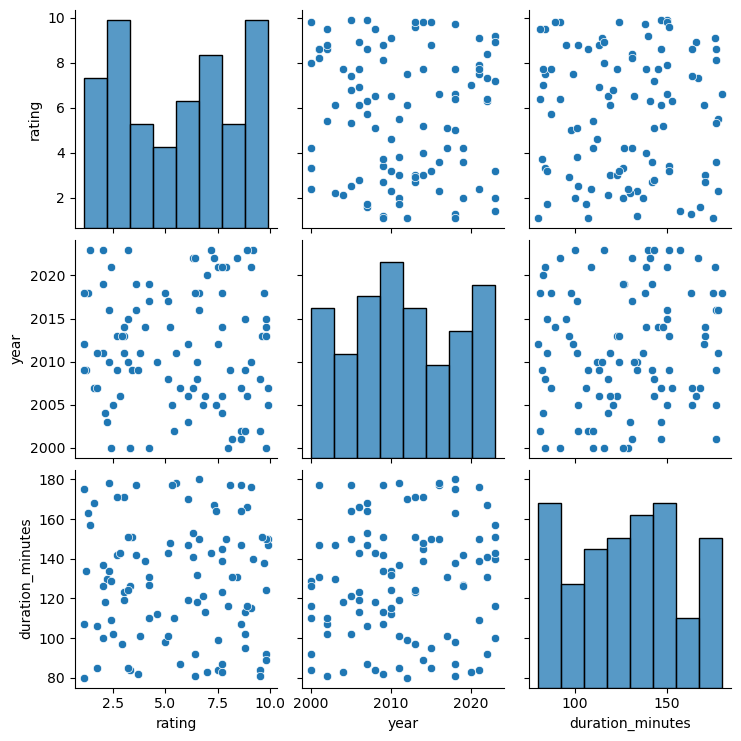

In [135]:
sns.pairplot(df)

### GIT

In [142]:
!git status

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   4_DS_CENTRAL_TENDENCY_MEASURES.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [143]:
!git add .

In [144]:
!git commit -m "adding CENTRAL_TENDENCY_MEASURES"

[main 1aade8f] adding CENTRAL_TENDENCY_MEASURES
 1 file changed, 84 insertions(+), 2 deletions(-)


In [145]:
!git push origin main

To github.com:gali-jithendra/LEARNINGS.git
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'github.com:gali-jithendra/LEARNINGS.git'
hint: Updates were rejected because the remote contains work that you do not
hint: have locally. This is usually caused by another repository pushing to
hint: the same ref. If you want to integrate the remote changes, use
hint: 'git pull' before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [146]:
!git status

On branch main
Your branch is ahead of 'origin/main' by 2 commits.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean
